# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college, and calculate 95% confidence intervals for each of these proportions.

In [2]:
# First always inspect the data
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
# Get the women between 35 and 50. The value of RIAGENDR is equal to 2 if a subject is female
middle_age_women = da.query('RIDAGEYR >= 35 & RIDAGEYR <= 50 & RIAGENDR == 2')

# Check that our data are correct! This step is not necessary but it is good practice :)
assert np.all(middle_age_women['RIAGENDR'] == 2)
assert np.all(middle_age_women['RIDAGEYR'] <= 50)
assert np.all(middle_age_women['RIDAGEYR'] >= 35)

In [4]:
# Partition the group into married and non-married women
married_middle_age_women = middle_age_women.query('DMDMARTL == 1')
non_married_middle_age_women = middle_age_women.query('DMDMARTL != 1')

# More data checks!
assert np.all(married_middle_age_women['DMDMARTL'] == 1)
assert np.all(non_married_middle_age_women['DMDMARTL'] != 1)

In [5]:
# We now have checked our data is valid and is partitioned correctly. We 
# now can compute the 90% confidence intervals for the proportion which have
# completed college. This is coded in the DMDEDUC2 variable and it is equal to
# 5 if they have completed college or above
married_and_completed_college = married_middle_age_women['DMDEDUC2'] == 5
p_hat_married = np.mean(married_and_completed_college)
married_sample_size = married_and_completed_college.size
"The proportion of married middle age women (N={}) who completed college is: {:.2f}".format(
    married_sample_size, 
    p_hat_married
)

'The proportion of married middle age women (N=449) who completed college is: 0.36'

In [6]:
# We can do the same for non-married women
non_married_and_completed_college = non_married_middle_age_women['DMDEDUC2'] == 5
p_hat_non_married = np.mean(non_married_and_completed_college)
non_married_sample_size = non_married_and_completed_college.size
"The proportion of non-married middle age women (N={}) who completed college is: {:.2f}".format(non_married_sample_size, p_hat_non_married)

'The proportion of non-married middle age women (N=338) who completed college is: 0.21'

In [7]:
# We can now compute the confidence intervals. Remember, for a two-sided 
# confidence interval, we need 5% in each of the tails and 95% PPF will give us
# this value !
z_multiplier = scipy.stats.norm.ppf(q = 0.95)
married_standard_error = np.sqrt(p_hat_married * (1 - p_hat_married) / married_sample_size)
ci_married_lower_bound = p_hat_married - z_multiplier * married_standard_error
ci_married_upper_bound = p_hat_married + z_multiplier * married_standard_error
"A 90% confidence interval for the proportion of married women who completed college is ({:.2f}, {:.2f})".format(
    ci_married_lower_bound, 
    ci_married_upper_bound
)

'The 90% confidence interval for the proportion of married women who completed college is (0.32, 0.40)'

In [8]:
# We now can do the same for non-married women
z_multiplier = scipy.stats.norm.ppf(q = 0.95)
non_married_standard_error = np.sqrt(p_hat_non_married * (1 - p_hat_non_married) / non_married_sample_size)
ci_non_married_lower_bound = p_hat_non_married - z_multiplier * non_married_standard_error
ci_non_married_upper_bound = p_hat_non_married + z_multiplier * non_married_standard_error
"A 90% confidence interval for the proportion of non-married women who completed college is ({:.2f}, {:.2f})".format(ci_non_married_lower_bound, ci_non_married_upper_bound)

'The 90% confidence interval for the proportion of non-married women who completed college is (0.18, 0.25)'

__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

The width of the confidence interval for the population proportion of married women who completed college is eight percentage points wide while the confidence interval for non-married women is seven points wide. The confidence interval for married women is larger, despite having a larger sample size, because the $\hat{p}_{married}$ estimate is closer to 50% than the $\hat{p}_{non-married}$ so the standard error of $\hat{p}_{married}$ is wider

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

We can see that, on average, a middle age woman who is married is more likely to have completed college than a middle age women who is not married, and the confidence intervals for these two estimates do not overlap.

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [9]:
# First, lets prepare our data
females = da.query('RIAGENDR == 2')
males = da.query('RIAGENDR == 1')

# I found the smoking variable here: https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQ_I.htm#SMQ020
is_female_smoker = females['SMQ020'] == 1
is_male_smoker = males['SMQ020'] == 1

In [10]:
# In order to reduce the chance of mistakes, I'm going to create a simple function
# for computing confidence intervals. This function will do the exact same steps as 
# above so nothing should be scary :)
def MakeAConfidenceInterval(data, confidence):
    p_hat = np.mean(data)
    n = data.size
    z_multiplier = scipy.stats.norm.ppf(q = 1 - (1 - confidence) / 2)
    standard_error = np.sqrt(p_hat * (1 - p_hat) / n)
    lower_bound = p_hat - z_multiplier * standard_error
    upper_bound = p_hat + z_multiplier * standard_error
    return {"phat": p_hat, "n":n, "lower_bound":lower_bound, "upper_bound":upper_bound}

In [11]:
female_smoking_ci = MakeAConfidenceInterval(data = is_female_smoker, confidence = 0.95)
"The CI for female smokers (N={}) is ({:.2f}, {:.2f})".format(
    female_smoking_ci['n'],
    female_smoking_ci['lower_bound'],
    female_smoking_ci['upper_bound']
)

'The CI for female smokers (N=2976) is (0.29, 0.32)'

In [12]:
male_smoking_ci = MakeAConfidenceInterval(data = is_male_smoker, confidence = 0.95)
"A CI for male smokers (N={}) is ({:.2f}, {:.2f})".format(
    male_smoking_ci['n'],
    male_smoking_ci['lower_bound'],
    male_smoking_ci['upper_bound']
)

'The CI for male smokers (N=2759) is (0.49, 0.53)'

In [13]:
# Now we can construct the confidence interval for the difference between the proportions.
# This formula is pretty long so we will break it down into parts

# First compute the standard error of the difference
standard_error = np.sqrt(
    female_smoking_ci['phat'] * (1 - female_smoking_ci['phat']) / female_smoking_ci['n'] + 
    male_smoking_ci['phat'] * (1 - male_smoking_ci['phat']) / male_smoking_ci['n']
)

# Get the z-multiplier for our 95% confidence interval
z_multiplier = scipy.stats.norm.ppf(q = 0.975)

# Compute the point estimate for the differences between the male and female smoking proportion
difference = male_smoking_ci['phat'] - female_smoking_ci['phat']

# Compute the lower_bound and the upper_bound of the confidence interval
lower_bound = difference - z_multiplier * standard_error
upper_bound = difference + z_multiplier * standard_error
"A CI for the difference between male smoking proportion less the female smoking proportion is ({:.2f}, {:.2f})".format(
  lower_bound,
  upper_bound
)

'The CI for the difference between male smoking proportion less the female smoking proportion is (0.18, 0.23)'

__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

When we look at the confidence interval for the males who smoke and the proportion of females who smoke, we see how they behave marginally. That is, we see how they behave in their own group. But in order to compare them directly, we also have to compute the confidence interval for the difference. This makes sure that the two samples are compared fairly and we, as much as possible, control for sample size differences. 

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

The width for the difference in proportions will always be larger than the widths of the two intervals it is made from. This happens because of the way the standard error is composed. In general, $\sqrt{A} < \sqrt{A + B}$ when $B > 0$

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [14]:
# First we get the data and look at it
height_data = da['BMXHT']
height_data.head()

0    184.5
1    171.4
2    170.1
3    160.9
4    164.9
Name: BMXHT, dtype: float64

In [15]:
# We can compute the 95% confidence interval using the same methods as before, 
# this time just using the formulas for a one population mean

# Get the sample standard deviation
s = np.std(height_data, ddof = 1)
n = height_data.size

# Compute the standard error
standard_error = s / np.sqrt(n)

# Compute the t-multiplier for a 95% confidence interval (2.5% in the tails)
t_multiplier = scipy.stats.t.ppf(q = 0.975, df = n - 1)

# Compute the confidence interval
x_hat = np.mean(height_data)
cm_lower_bound = x_hat - t_multiplier * standard_error
cm_upper_bound = x_hat + t_multiplier * standard_error
"A CI for the height, in centimeters, of someone in the study is: ({:.2f}, {:.2f})".format(
  cm_lower_bound,
  cm_upper_bound
)

'The CI for the height, in centimeters, of someone in the study is: (165.88, 166.40)'

In [16]:
# We can do the same thing for height in inches

inches_height_data = height_data / 2.54

# Get the sample standard deviation
s = np.std(inches_height_data, ddof = 1)
n = inches_height_data.size

# Compute the standard error
standard_error = s / np.sqrt(n)

# Compute the t-multiplier for a 95% confidence interval (2.5% in the tails)
t_multiplier = scipy.stats.t.ppf(q = 0.975, df = n - 1)

# Compute the confidence interval
x_hat = np.mean(inches_height_data)
inches_lower_bound = x_hat - t_multiplier * standard_error
inches_upper_bound = x_hat + t_multiplier * standard_error
"The CI for the height, in inches, of someone in the study is: ({:.2f}, {:.2f})".format(
  inches_lower_bound,
  inches_upper_bound
)

'The CI for the height, in inches, of someone in the study is: (65.31, 65.51)'

In [17]:
# If we convert the measurements back and forth between units, our answers should not change
"The cm lower bound ({:.2f}) converted to inches is {:.2f} (actual = {:.2f})".format(
    cm_lower_bound, 
    cm_lower_bound / 2.54, 
    inches_lower_bound
)

'The cm lower bound (165.88) converted to inches is 65.31 (Actual = 65.31)'

In [18]:
"The cm upper bound ({:.2f}) converted to inches is {:.2f} (actual = {:.2f})".format(
    cm_upper_bound, 
    cm_upper_bound / 2.54, 
    inches_upper_bound
)

'The cm upper bound (166.40) converted to inches is 65.51 (Actual = 65.51)'

__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

They are equal. The units of a measurement should not impact how the statistical inference on that quantity is performed for confidence intervals like these 

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [19]:
# Get all of the ranges of age using the cut function
age_ranges = pd.cut(da['RIDAGEYR'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80])
age_ranges.head()

0    (60, 70]
1    (50, 60]
2    (70, 80]
3    (50, 60]
4    (40, 50]
Name: RIDAGEYR, dtype: category
Categories (8, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

In [20]:
# Get a unique list of all of the age ranges:
unique_age_ranges = list(set(age_ranges))
unique_age_ranges

[Interval(60, 70, closed='right'),
 Interval(20, 30, closed='right'),
 Interval(70, 80, closed='right'),
 Interval(50, 60, closed='right'),
 Interval(30, 40, closed='right'),
 Interval(10, 20, closed='right'),
 Interval(40, 50, closed='right')]

In [21]:
# First we are going to construct a function for creating the confidence interval of a mean.
# This formula can be complicated so don't worry if you have to take a little bit of time
# to understand it
def MakeUnPooledMeanConfidenceInterval(data_one, data_two, confidence):
    n1 = data_one.size
    n2 = data_two.size
    
    v1 = np.var(data_one, ddof = 1)
    v2 = np.var(data_two, ddof = 1)
    
    standard_error = np.sqrt(v1 / n1 + v2 / n2)
    
    t_multiplier = scipy.stats.t.ppf(1 - (1 - confidence) / 2, df = min(n1, n2))
    
    diff = np.mean(data_one) - np.mean(data_two)
    
    lower_bound = diff - t_multiplier * standard_error
    upper_bound = diff + t_multiplier * standard_error
    
    return {"n1": n1, "n2": n2, "lower_bound": lower_bound, "upper_bound": upper_bound}

In [22]:
# Now we are going to loop through each of the age ranges, make our dataframes, and 
# compute the confidence intervals !
for age_range in sorted(unique_age_ranges):
    is_this_age = da[age_ranges == age_range]
    males_bmi = is_this_age[is_this_age['RIAGENDR'] == 1]['BMXBMI']
    females_bmi = is_this_age[is_this_age['RIAGENDR'] == 2]['BMXBMI']
    ci = MakeUnPooledMeanConfidenceInterval(males_bmi, females_bmi, 0.95)
    print("Age: {} | CI for difference in male (n1:{}) bmi less female (n2:{}) bmi: ({:.2f}, {:.2f}) | Width: {:.2f}".format(
        age_range, 
        ci["n1"],
        ci["n2"],
        ci['lower_bound'], 
        ci['upper_bound'], 
        ci['upper_bound'] - ci['lower_bound']
    ))

Age: (10, 20] | CI for difference in male (n1:175) bmi less female (n2:165) bmi: (-1.70, 1.29) | Width: 3.00
Age: (20, 30] | CI for difference in male (n1:432) bmi less female (n2:514) bmi: (-1.63, 0.21) | Width: 1.85
Age: (30, 40] | CI for difference in male (n1:458) bmi less female (n2:474) bmi: (-1.68, 0.25) | Width: 1.93
Age: (40, 50] | CI for difference in male (n1:401) bmi less female (n2:502) bmi: (-2.38, -0.49) | Width: 1.90
Age: (50, 60] | CI for difference in male (n1:454) bmi less female (n2:470) bmi: (-2.39, -0.64) | Width: 1.75
Age: (60, 70] | CI for difference in male (n1:437) bmi less female (n2:441) bmi: (-2.59, -0.78) | Width: 1.81
Age: (70, 80] | CI for difference in male (n1:402) bmi less female (n2:410) bmi: (-1.96, -0.40) | Width: 1.56


__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial differences in the confidence interval widths that you see.

These confidence intervals could vary for a number of reasons. The main reason why they vary is the sample sizes of some partitions are drastically larger than others. For example, in the 10-20 age range, we only have 175 males and 165 females. Compare this with the rest of the partitions which have usually 400-500 samples. This sample size difference makes a large difference in the standard error and also the resulting interval. 

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [23]:
# First we can prep the data by extracting out the variables from our dataframe. 
first_systolic = da['BPXSY1']
second_systolic = da['BPXSY2']

# Compute the differences
diff_systolic = first_systolic - second_systolic

In [24]:
# We already did the long form math above so I'm going to create a function to do this
# more systematically
def ComputeMeanConfidenceInterval(data, confidence):   
    s = np.std(data, ddof = 1)
    n = data.size
    standard_error = s / np.sqrt(n)
    t_multiplier = scipy.stats.t.ppf(q = 1 - (1 - confidence) / 2, df = n - 1)

    # Compute the confidence interval
    x_hat = np.mean(data)
    lower_bound = x_hat - t_multiplier * standard_error
    upper_bound = x_hat + t_multiplier * standard_error
    return {"lower_bound": lower_bound, "upper_bound": upper_bound, "n": n}

# Create a really simple function for printing out the confidence interval of our data
def PrintCIForSystolicMeasures(input_map, name_of_data):
    print("The confidence interval for the {} data is: ({:.2f}, {:.2f})".format(
        name_of_data, 
        input_map["lower_bound"], 
        input_map["upper_bound"]
    ))

In [25]:
# Compute the CI for the first_systolic and second_systolic measures
first_ci = ComputeMeanConfidenceInterval(first_systolic, confidence = 0.95)
PrintCIForSystolicMeasures(first_ci, "First Systolic")
second_ci = ComputeMeanConfidenceInterval(second_systolic, confidence = 0.95)
PrintCIForSystolicMeasures(second_ci, "Second Systolic")
# We are fortunate: the math for a mean difference confidence interval is the 
# same as the math for a one-population mean interval so we can reuse the function
# above
diff_ci = ComputeMeanConfidenceInterval(diff_systolic, confidence = 0.95)
PrintCIForSystolicMeasures(diff_ci, "the difference in the first and second systolic")

The confidence interval for the First Systolic data is: (124.61, 125.56)
The confidence interval for the Second Systolic data is: (124.30, 125.26)
The confidence interval for the the difference in the first and second systolic data is: (0.54, 0.81)


__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

From our data, we estimate with 95% confidence the population mean difference between the first and second systolic blood pressure measures is in between 0.54 and 0.81 units. Since zero is not within this interval, we have sufficient evidence to reject the claim, at the 95% confidence level, that the population mean difference between the first and second systolic blood pressure measures is zero.

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

The within subject variation (the difference of the two measures) is less than the intra-population variation (the variation within the first measure itself and the variation within the second measure itself). This is to say, a person is more like themselves than they are like the population of first and second measures. 

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [26]:
# We can prepare our data by subsetting for smokers and non-smokers and then extacting their age
age_smokers = da[da['SMQ020'] == 1]['RIDAGEYR']
age_non_smokers = da[da['SMQ020'] == 2]['RIDAGEYR']

# We are going to recycle our function from above to make sure we don't make any silly mistakes! 
diff_age_ci = MakeUnPooledMeanConfidenceInterval(age_smokers, age_non_smokers, confidence = 0.95)
"A CI for the age difference between smokers less non-smokers is: ({:.2f}, {:.2f}) years".format(
    diff_age_ci["lower_bound"], 
    diff_age_ci["upper_bound"]
)

'The CI for the age difference between smokers less non-smokers is: (5.89, 7.78) years'

__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

The mean of smokers age is: 52.10
The standard deviation of smokers age is: 17.46


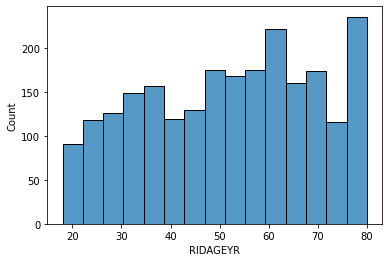

In [27]:
# Create a histogram for smokers
sns.histplot(age_smokers)
print("The mean of smokers age is: {:.2f}".format(np.mean(age_smokers)))
print("The standard deviation of smokers age is: {:.2f}".format(np.std(age_smokers, ddof = 1)))

The mean of smokers age is: 45.26
The standard deviation of smokers age is: 18.54


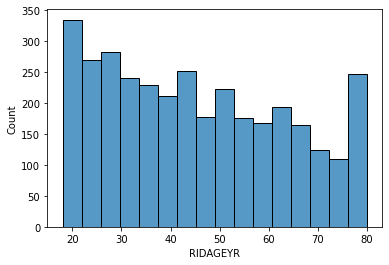

In [28]:
# Create a histogram for nonsmokers
sns.histplot(age_non_smokers)
print("The mean of smokers age is: {:.2f}".format(np.mean(age_non_smokers)))
print("The standard deviation of smokers age is: {:.2f}".format(np.std(age_non_smokers, ddof = 1)))

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?

The standard deviation of non-smokers is larger than the standard deviation for smokers, so that would be contributing more than the uncertainty for smokers. Smokers, on average, are older